# Estimation and Predictions

Estimation is a broad term used in machine learning, and generally refers to approximating a parameter for some algorithm or system. Where as predictions are generally refered to as forecasting.


### Prediction VS Classification :

Classification is a way of automatically sorting information/data into categories, where as prediction aims to determine a trend in the data to be able to determine what will or can happen, for scenarios that have yet to be observed.




![alt text](https://cdn-images-1.medium.com/max/639/1*4sixxtuD8unWceZ-yp9TgQ.jpeg "Classification VS Regression")


### What is Regression

Regression analysis is used to estimate relationships amongst variables. It uses statistical processes for modeling and analyzing several variables where the goal is to determine a relationship between a dependent variable (the variable we want to predict) and one or more independent variables (or predictors). This gives insight on how, changes in the independent variables affect the value of the dependent variable. 
 
 * Commonly used types of Regression:
   - Linear Regression
   - Polynomial Regression
   - Multivariate Regression
   - Logistic Regression
   - Ridge Regression

For the purposes of this Workshop, we will cover Linear and Polynomial Regression.


## Simple Linear Regression
In <b>Linear Regression</b>, we seek to find a line of best fit for the data. This line of best fit is modelled by the function : 
            <para> <center> $ y = c_{0} + c_{1}x $  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  <i> ... </i> &nbsp;&nbsp;&nbsp;&nbsp; <b>[1] </b> </center> </para>
 * $ y $ - is called the dependent variable, which is the value we want to <b>predict</b>
 * $ x $ - are the input variable and are the features or explanatory variables
 * $ c_{i} $ - are the coefficients of the linear equation that need to be <b>estimated</b>

This is what the simple straight line function looks like. 
![alt text](https://www-users.york.ac.uk/~mb55/msc/maths/graph036.gif "Straight Line Function")

Lets look at an example !

First lets generate a sample data set, using numpy, where we have a basic idea of the distribution of the data and what it looks like. We will define the relationship between the independent and dependent variables using the following equation:
 <center> $ y = 2x + 5 $ </center>

In [1]:
import numpy as np # first load the needed libraries

np.random.seed(1234567) # This is to ensure repeatability in results

x = np.random.random(100)*20 # Generate a random set of 100 input variables
y =  np.array([ 2*v + 5 for v in x]) # Can genereate a new array by modifying each element in x
print(x[:10]) #print the first 10 values
print(y[:10]) #print the first 10 values

[  4.74058337   0.15296748   0.39660617   6.26185237   1.98909328
   3.90348584   4.14596044   3.29862382  14.23757917   0.64133346]
[ 14.48116674   5.30593495   5.79321233  17.52370475   8.97818657
  12.80697168  13.29192088  11.59724765  33.47515834   6.28266693]


Lets Plot this data to see what the true line the data follows looks like.

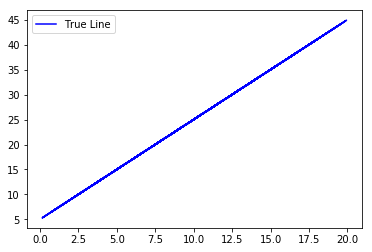

In [2]:
import matplotlib.pyplot as plt


plt.plot(x,y, 'b', label='True Line')
plt.legend()
plt.show()

Performing regression on the data as it stands, would not be very useful. We can add some random noise to the data to give the data a bit more variability. 

In [3]:
y1 =  np.array([ v + (np.random.random()-0.5)*4 for v in y]) #this introduces some noise into the data
print(y1[:10])

[ 13.252476     4.97756555   6.45845676  18.47020425   8.49007679
  11.65526164  14.25119126   9.85518374  33.96142987   4.69083024]


Now that we have some sample data, we first need split the data into training a test sets. This will allow us to gain insight into the accuracy of the linear regression model created on the data. If we were to just use the entire data set to train and test, there we would not have a very accurate idea of how well the model will work for data it has not seen before.

General practice for splitting data into training and test sets is a 70/30 ratio of the entire data set (i.e. 70% of the full data set for training the model and 30% to test the model). In some cases tuning is required on the model parameters for optimization, in this case we would make it a 70/20/10 split between the training, test and evaluation sets. The evaluation set is used to tune the model parameters faster, since in many cases using large test sets for model optimization can be time consuming. Having a smaller evaulation set makes tuning much faster.


In [6]:
x_train = x[:-30]
x_test = x[-30:]

y_train = y1[:-30]
y_test = y1[-30:]

Now we have a set of input data and a set of dependent data. Lets see what it looks like.

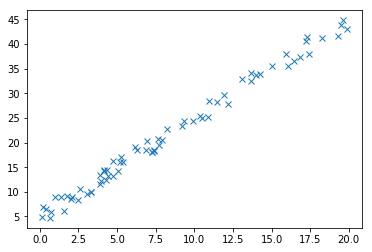

In [7]:
import matplotlib.pyplot as plt # this is the library we will be using to make a simple 2-D scatter plot of our data

plt.plot(x_train,y_train,'x',label="Original Data")
plt.show()

Before we move onto using Linear Regression to estimate the line of best fit, we can look at what the true line for the data looks like.

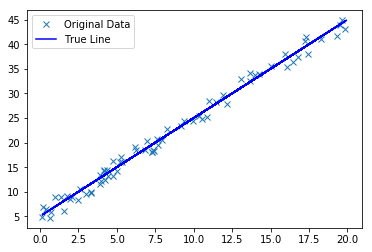

In [8]:
plt.plot(x_train,y_train,'x',label="Original Data")
plt.plot(x,y, 'b', label='True Line')
plt.legend()
plt.show()

Now, assume we didnt know what the true line across the data was, how do we find it ?

Using SciPy, which give us access to an implementation of the linear regression algorithm, this becomes a simple task.
This can be found in SciPy's stats module, which contains a large number of probability distributions as well as a growing library of statistical functions, linear regression being one of these statistical functions.

In [9]:
import scipy.stats as scs #the scipy library, and specifically the stats module.

gradient,intercept,r,p,err = scs.linregress(x_train,y_train) #estimate trend line

Great, now that the variables have been estimated, what does this output mean ?
 * $ gradient $ - this is the slope of the straigth line, $ c_{1} $in equation 1
 * $ intercept $ - this defines the y-intercept of the straight line, $ c_{0} $ in equation 1
 * $ r $ - is the correlation coefficient ( $ R^2 $ ) , whose range is [-1,1]. Where $ R^2 $ describes the correlation between the dependent variable and input variables. A $ R^2 $ value close to 0 and below denotes almost no correlation between the data, where as a $ R^2 $ value closer or equal to 1 denotes a high correlation between input and dependent vairables. 
 * $ p $ - is the strength of evidence in support of a null hypothesis
 * $ err $ - Standard error of the estimated gradient
 
 [comment]: <> ( Explain some of the technique used for linear regression)
 
 
 ### How does it calculate this ?
 
 There are a few algorithms available to perform linear regression, Scikit-Learn uses a method called Ordinary Least Squares.
 <br>
 ![alt text](lin_reg_least_squares.png "Ordinary Least Squares")
 
 This aims to minimize the distance between the every point in the training data set and the regression line.
 
 Now lets add this to out plot !

Estimated Gradient (c1) : 1.9958
Estimated Intercept (c0) : 4.9408
r^2 value 0.9896
P-values : 0.0000
Estimated Error : 0.0248


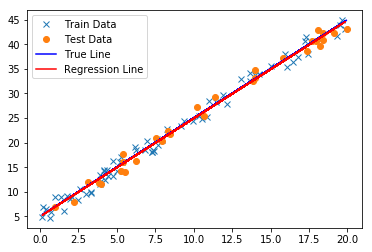

In [10]:
print("Estimated Gradient (c1) : %3.4f\nEstimated Intercept (c0) : %3.4f"%(gradient,intercept))
print("r^2 value %3.4f"%(r*r))
print("P-values : %3.4f"%(p))
print("Estimated Error : %3.4f"%(err))
estimated = gradient*x_train + intercept # generating predicted values for each sample in train set.
plt.plot(x_train,y_train,'x',label="Train Data")
plt.plot(x_test,y_test,'o',label="Test Data")
plt.plot(x,y, 'b', label='True Line')
plt.plot(x_train,estimated, 'r', label='Regression Line')
plt.legend()
plt.show()

# Using Linear Regression for Prediction

Now that we have an idea of what linear regression does, how do we use this output to predict something ?

Since we are using linear regression, the estimated equation is the predictor function we will use.
This means we simply need to use the linear equation to predict the dependent variable using the estimated coefficients to complete the equation.

In [11]:
print("Actual Line of Best Fit : y = 2x + 5")
print("Estimated Line of Best Fit : y = %3.4fx + %3.4f"%(gradient,intercept))

Actual Line of Best Fit : y = 2x + 5
Estimated Line of Best Fit : y = 1.9958x + 4.9408


So in the case of simple linear regression, we simply use the estimated equation to predict the dependent value ( $ y $ ) for for new input data ( $ x $ ). We can use the mean squared error algorithm to measure the accuracy of the model. The mean squared error algorithm, give an indication of how far off (on average) the predictor is but averaging the square of the errors for each test sample predicted.

In [12]:
import math

mean_sqrd_err = 0.0
est_test = gradient*x_test + intercept # predicting values for each sample in test set.
for i in range(0,len(est_test)) :
    mean_sqrd_err += math.pow((est_test[i]- y_test[i]),2)
mean_sqrd_err = mean_sqrd_err/len(est_test)
print(mean_sqrd_err)

1.3524315669804785
